**Dataset Information**.
1) id: unique identifier  
2) gender: "Male", "Female" or "Other"  
3) age: age of the patient  
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension  
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease  
6) ever_married: "No" or "Yes"  
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"  
8) Residence_type: "Rural" or "Urban"  
9) avg_glucose_level: average glucose level in blood  
10) bmi: body mass index  
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"     
12) stroke: 1 if the patient had a stroke or 0 if not  

reference  
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [1]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import warnings # For suppressing warnings
warnings.filterwarnings("ignore")

## Importing the data

In [2]:
# Reading the dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
# checking first 5 rows of dataset
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


## Data Exploration

In [4]:
# checking the shape of dataset
print(df.shape)

(5110, 12)


**Conclusion**: There are 5110 rows and 12 columns in the dataset.

In [5]:
# checking missing values
print(df.isna().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


**Conclusion:** The dataset has 1 column of missing value on bmi column

In [6]:
# Checking any null values, columns data types, number of entries
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


**Conclusion:**
The dataset has 5110 total entries, 12 total columns, Only bmi column has missing values. There are 3 floating datatypes, 4 integer datatypes and 5 are the object datatypes.

In [7]:
# Finding duplicate Rows
df[df.duplicated()].sum()

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

**Conclusion:** There are no duplicate rows present in the dataset

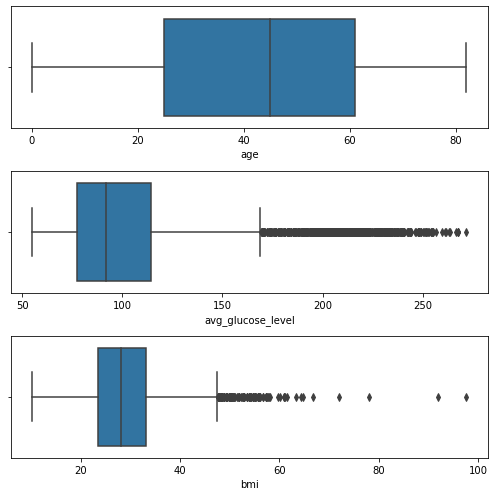

In [8]:
# Checking for Possible Outliers
fig, axs = plt.subplots(3, figsize = (7,7))
plt1 = sns.boxplot(df['age'], ax = axs[0])
plt4 = sns.boxplot(df['avg_glucose_level'], ax = axs[1])
plt5 = sns.boxplot(df['bmi'], ax = axs[2])
plt.tight_layout()

**Conclusion:** 
No outliers in age feature.
Outliers are present in both bmi and avg_glucose_level.

In [9]:
# reading some statistical information
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Exploratory Data Analysis

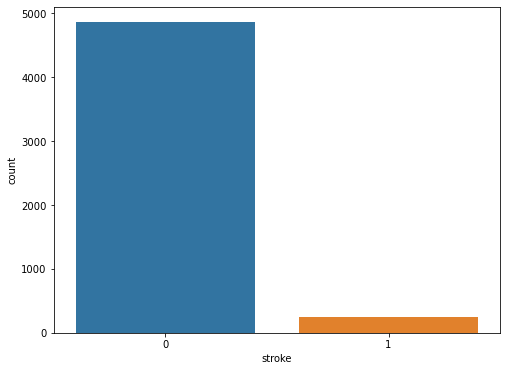

In [10]:
# Analysis of Stroke 
plt.figure(figsize=(8,6))
sns.countplot(x = 'stroke', data = df)
plt.show()

According to the output above, there are more individuals who do not suffer from stroke than those who do.

<AxesSubplot:xlabel='age', ylabel='Density'>

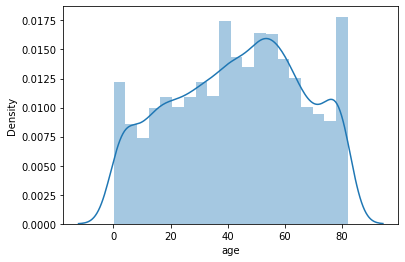

In [11]:
sns.distplot(df['age'], hist=True, kde=True)

Most of the individuals of the dataset are of age 40 and above. The age distribution of female subjects is closer to normal distribution.

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

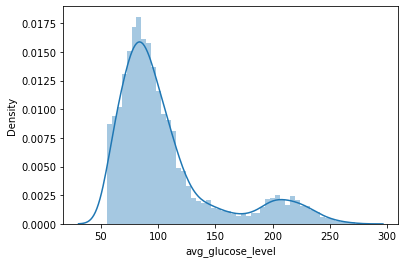

In [12]:
sns.distplot(df['avg_glucose_level'], hist=True, kde=True)

Most of the individuals have 75-100 average glucose levels.
avg_glucose_level has right skewed distribution

<AxesSubplot:xlabel='bmi', ylabel='Density'>

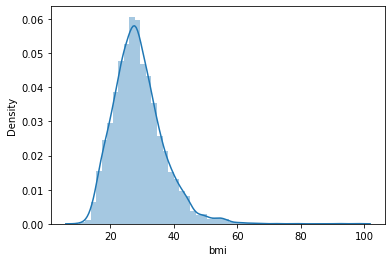

In [13]:
sns.distplot(df['bmi'], hist=True, kde=True)

Most of the individuals of the dataset has BMI index between 20-30 kilogram/metresq.
avg_glucose_level has right skewed distribution.

<AxesSubplot:>

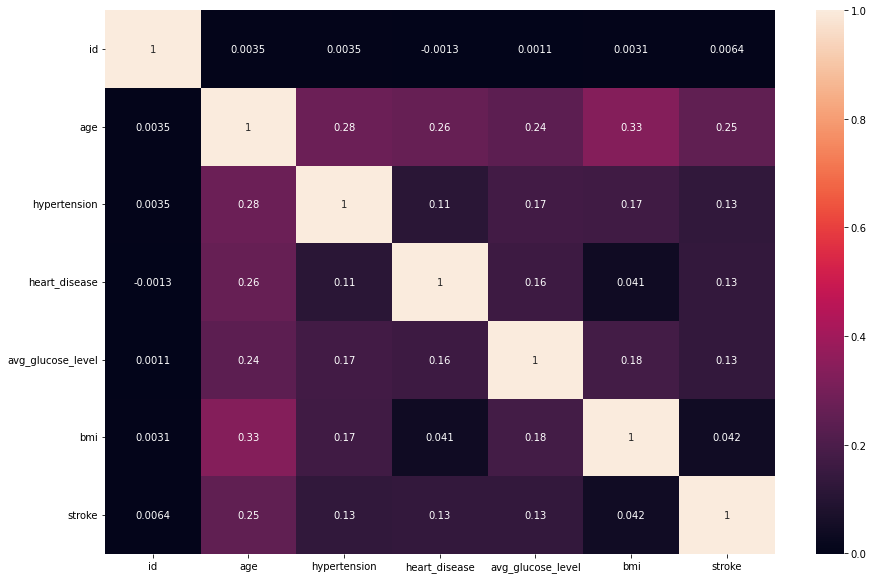

In [14]:
# Correlation plot
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

**Conclusion:**

No strong correlation is observed between any of the features.
Variables that are showing some effective correlation are:  
age, hypertension, heart_disease, avg_glucose_level.

## Data Preprocessing

In [15]:
# Impute missing values
df['bmi'].fillna(df['bmi'].median(),inplace=True)

In [16]:
# drop irrelavant column
df=df.drop('id',axis=1)

In [17]:
# dropping 'Other' in gender
df.drop(df[df['gender'] == 'Other'].index, inplace = True)

In [18]:
# categorical data into numeric ones using Label Encoder
categorical_data=df.select_dtypes(include=['object']).columns
le=LabelEncoder()
df[categorical_data]=df[categorical_data].apply(le.fit_transform)

In [19]:
# Separating dataset into input and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [20]:
#Splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# oversampling the train datsets using SMOTE
smote=SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)

## Model Building

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=25)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test) 

[[910  50]
 [ 52  10]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.17      0.16      0.16        62

    accuracy                           0.90      1022
   macro avg       0.56      0.55      0.56      1022
weighted avg       0.90      0.90      0.90      1022



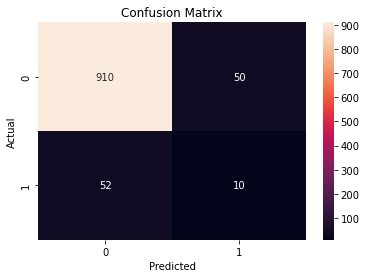

In [23]:
#Confusion matrix and classification report
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)

sns.heatmap(con_mat, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test, y_pred))